In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np
import h5py

np.random.seed(7)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

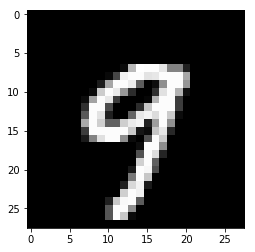

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[45], plt.get_cmap('gray'))
plt.show()

In [13]:
# Result
y_train[45]

9

In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train[:, np.newaxis, :, :]
x_test = x_test[:, np.newaxis, :, :]

In [15]:
def conv(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (2,2), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
    model.add(Conv2D(64, (2,2), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (2,2), padding='same', activation='relu'))
    model.add(Conv2D(128, (2,2), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(classes, activation='softmax'))

    return model

In [17]:
model = conv((1, 28, 28), 10)
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size= 512, validation_split=0.2)

model.save('cifarr.h5')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 1, 28, 32)         3616      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 1, 28, 32)         4128      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 14, 16)         0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 14, 16)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 1, 14, 64)         4160      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 1, 14, 64)         16448     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 7, 32)          0         
__________

In [18]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 193us/step


[0.06556075856136158, 0.979]

In [ ]:
## 97.9 % accuracy